<a href="https://colab.research.google.com/github/ShvetsovEgor/ML/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B8_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B7%D1%80%D0%B5%D0%BD%D0%B8%D1%8F_%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Скачайте датасет cifar10, посмотрите на картинке, разделите выборки и обучите одну полносвязную архитектуру из прошлого домашнего задания. Используйте SparseCategoricalCrossentropy. Выведите summary модели, посмотрите на графики обучения, сделайте выводы.

In [13]:
import tensorflow as tf
from keras.utils import to_categorical

In [16]:
(train_images_full, train_labels_full), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images_full, test_images = train_images_full / 255.0, test_images / 255.0

In [17]:
print("Train size = %i, test_size = %i"%(len(train_images_full),len(test_images)))

Train size = 50000, test_size = 10000


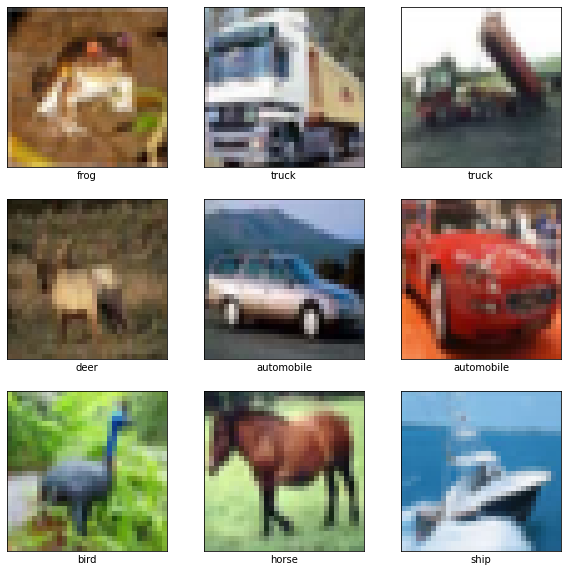

In [18]:
import matplotlib.pyplot as plt


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels_full[i][0]])
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
val_size = 0.01

train_images, validation_images, train_labels, validation_labels = train_test_split(train_images_full, train_labels_full, test_size=val_size) 


In [20]:
batch_size = 512

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))  ### your code here
train_dataset = train_dataset.shuffle(buffer_size=1024, reshuffle_each_iteration=True)
train_dataset = train_dataset.batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels)) ### your code here
val_dataset = val_dataset.batch(batch_size)

train_labels = to_categorical(train_labels, num_classes=None)
validation_labels = to_categorical(validation_labels, num_classes=None)

In [22]:
input_shape = train_images.shape[-3:]

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10)])

model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['Accuracy', 'Precision', 'Recall'])


In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               393344    
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 395,146
Trainable params: 394,890
Non-trainable params: 256
_________________________________________________________________


In [24]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:

from livelossplot import PlotLossesKeras
model.fit(train_dataset, validation_data=val_dataset, epochs=100, callbacks=[PlotLossesKeras()], verbose=False)

ValueError: ignored